In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sbn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.svm import SVR,SVC
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import r2_score,confusion_matrix

In [2]:
data=pd.read_csv("ortopedik_hastaların_biyomekanik_özellikleri_20220209.csv")

C:\Users\polat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


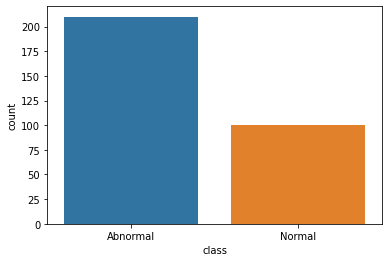

In [3]:
sbn.countplot(data["class"])
c_data=data.copy()

In [4]:
data["class"]=[1 if i=="Abnormal" else 0  for i in data["class"]]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [6]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


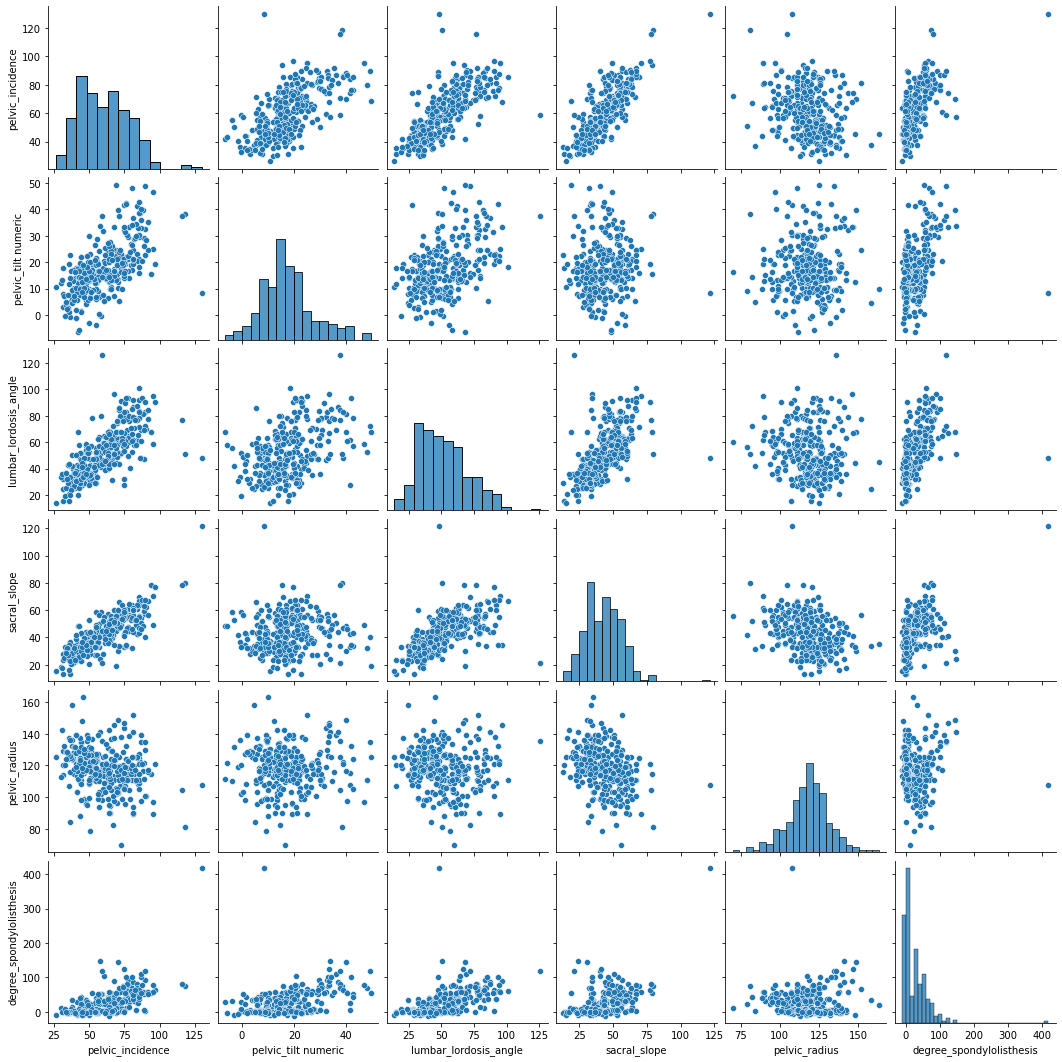

In [7]:
y=data["class"].values
x=data.drop("class",axis=1)
sbn.pairplot(x)

In [8]:
scaler=MinMaxScaler()
X=scaler.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)
X

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240


In [9]:
x_=(x-np.min(x))/(np.max(x)-np.min(x)).values
x_

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240


In [10]:
x1,x2,y1,y2=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
x1_t=x1.T
x2_t=x2.T
y1_t=y1.T
y2_t=y2.T


# Lojistik Regresyon(Logistic Regression) 

#Hazır Algoritma

In [12]:
lr=LogisticRegression()
lr.fit(x1,y1)


LogisticRegression()

In [13]:
doğruluk=lr.score(x2,y2)
print(f"Test Setine Göre Doğruluk :{doğruluk}")

Test Setine Göre Doğruluk :0.7741935483870968


In [14]:
tahmin_lr=lr.predict(x2)
tahmin_lr=pd.DataFrame(tahmin_lr)
y2_lr=pd.DataFrame(y2)
sonuc_lr=pd.concat([tahmin_lr,y2_lr],axis=1)
sonuc_lr.columns=["Tahmin Edilen Değerler","Gerçek Değerler"]
sonuc_lr

,Tahmin Edilen Değerler,Gerçek Değerler
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
57,1,1
58,1,1
59,1,0
60,1,0


#elle yazılmış fonksiyonlar

In [15]:
#ilklendirme
def ilklendirmeAgirlikEgilim(boyut):
    w=np.full((boyut,1),0.01)
    b=0.0
    return w,b


In [16]:
#sigmoid
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head
sigmoid(0)

0.5

In [17]:
#ileri geri yayılma
def ileriGeriYayilma(w,b,x_train,y_train):
    #ileri yayılma
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    
    #geri yayılım
    derivative_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]
    
    gradients={"derivative_weight" : derivative_weight, "derivative_bias":derivative_bias}
    return cost,gradients

In [35]:
def update (w,b,x_train,y_train,ogrenme_orani,iterasyon_sayisi):
    cost_list=[]
    cost_list2=[]
    index=[]
    #iterasyon sayısı kadar
    for i in range (iterasyon_sayisi):
        #ileri ve geri yayılım yap : maliyet ve gradyant hesapla
        cost,gradients=ileriGeriYayilma(w,b,x_train,y_train)
        cost_list.append(cost)
        #güncelle
        w=w-ogrenme_orani*gradients["derivative_weight"]
        b=b-ogrenme_orani*gradients["derivative_bias"]
        if i % 100==0:
            cost_list2.append(cost)
            index.append(i)
            print("%i iterasyondan sonra maliyet : %f"%(i,cost))

    #ağırlık değerleri ve yanlılık değerlerini hesapla
    parameters={"weight":w,"bias":b}
    mp.plot(index,cost_list2)
    mp.xticks(index,rotation="vertical")
    mp.xlabel("iterasyon Sayısı")
    mp.ylabel("Maliyet")
    mp.show()
    return parameters,gradients,cost_list

#Tahminleme

In [36]:
def Predict(w,b,x_test):
    #x test, ileri yayılım için girdi oluştur
    z=sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction=np.zeros((1,x_test.shape[1]))
    #eğer z 0.5 den büyükse 1 numaralı sınıf
    #eğer z 0.5 den küçükse 0 numaralı sınıf
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
            
    return Y_prediction

In [39]:
def logistic_regression (x_train,x_test,y_train,y_test,ogrenme_orani,iterasyon_sayisi):
    #ilklendir
    dimension=x_train.shape[0]
    w,b=ilklendirmeAgirlikEgilim(dimension)
    #öğrenme oranını değiştirme
    parameters,gradients,cost_list=update(w,b,x_train,y_train,ogrenme_orani,iterasyon_sayisi)
    
    y_prediction_test=Predict(parameters["weight"],parameters["bias"],x_test)
    #test doğruluğu hesapla
    print("test doğruluğu : {} %".format(100-np.mean(np.abs(y_prediction_test))))


0 iterasyondan sonra maliyet : 0.688983
100 iterasyondan sonra maliyet : 0.523381
200 iterasyondan sonra maliyet : 0.498761
300 iterasyondan sonra maliyet : 0.485939
400 iterasyondan sonra maliyet : 0.476648
500 iterasyondan sonra maliyet : 0.469011
600 iterasyondan sonra maliyet : 0.462384
700 iterasyondan sonra maliyet : 0.456465
800 iterasyondan sonra maliyet : 0.451082
900 iterasyondan sonra maliyet : 0.446124


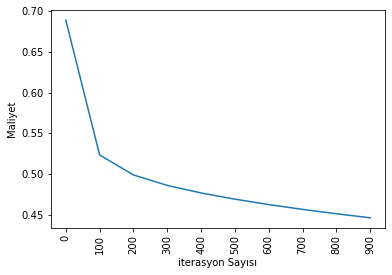

test doğruluğu : 99.2258064516129 %


In [40]:
logistic_regression(x1_t,x2_t,y1_t,y2_t,ogrenme_orani=1,iterasyon_sayisi=1000)

# K- En  Yakın Komşu (K-NN)

In [22]:
data_knn=data.copy()
data_knn

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


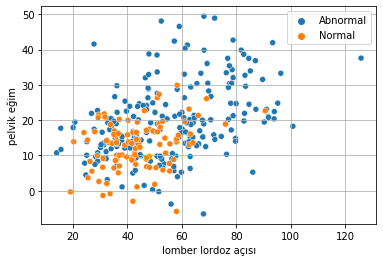

In [23]:
sbn.scatterplot(data=c_data,x=data_knn.lumbar_lordosis_angle,y=data_knn.iloc[:,1],hue="class")
mp.xlabel("lomber lordoz açısı")
mp.ylabel("pelvik eğim")
mp.legend()
mp.grid(True)

In [24]:
knn_c=KNeighborsClassifier(n_neighbors=4)
knn_c.fit(x1,y1)
tahmin_knn=knn_c.predict(x2)
doğruluk_knn=knn_c.score(x2,y2)
print(f"4 Komşulu K-NN Algoritması Doğruluğu :{doğruluk_knn}")


4 Komşulu K-NN Algoritması Doğruluğu :0.7580645161290323


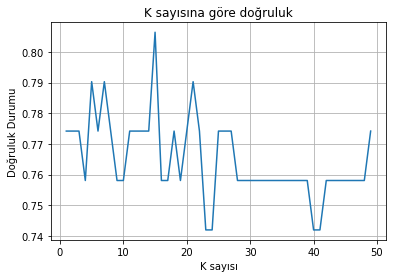

In [25]:
score_list=[]
liste=np.arange(1,50)
for i in range (1,50):
    knn_score=KNeighborsClassifier(n_neighbors=i)
    knn_score.fit(x1,y1)
    score_list.append(knn_score.score(x2,y2))
    
mp.plot(liste,score_list)
mp.xlabel("K sayısı")
mp.ylabel("Doğruluk Durumu")
mp.title("K sayısına göre doğruluk")
mp.grid(True)
    

# Destek Vektör Makinası (Support Vector Machine/SVM)

In [26]:
svm=SVC(random_state=42)
svm.fit(x1,y1)
doğruluk_svm=svm.score(x2,y2)
print(f"Destek Vektör Makinesi Doğruluğu :{doğruluk_svm}")

Destek Vektör Makinesi Doğruluğu :0.8064516129032258


In [27]:
tahmin_svm=svm.predict(x2)
tahmin_svm=pd.DataFrame(tahmin_svm)
y2_svm=pd.DataFrame(y2)
sonuc_svm=pd.concat([tahmin_svm,y2_svm],axis=1)
sonuc_svm.columns=["Tahmin Edilen Değerler","Gerçek Değerler"]
sonuc_svm

,Tahmin Edilen Değerler,Gerçek Değerler
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
57,1,1
58,1,1
59,1,0
60,1,0


# Karar Ağacı (Decision Tree)

In [28]:
dt=DecisionTreeClassifier()
dt.fit(x1,y1)
doğruluk_dt=dt.score(x2,y2)
print(f"Karar Ağacı Doğruluğu :{doğruluk_dt}")

Karar Ağacı Doğruluğu :0.7741935483870968


In [29]:
tahmin_dt=dt.predict(x2)
tahmin_dt=pd.DataFrame(tahmin_dt)
y2_dt=pd.DataFrame(y2)
sonuc_dt=pd.concat([tahmin_dt,y2_dt],axis=1)
sonuc_dt.columns=["Tahmin Edilen Değerler","Gerçek Değerler"]
sonuc_dt

,Tahmin Edilen Değerler,Gerçek Değerler
0,0,0
1,1,1
2,0,1
3,1,1
4,0,1
...,...,...
57,1,1
58,1,1
59,1,0
60,0,0


# Rastgele Orman (Random Forrest)


In [30]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x1,y1)
doğruluk_rf=rf.score(x2,y2)
print(f"Rastgele Orman Doğruluğu :{doğruluk_rf}")

Rastgele Orman Doğruluğu :0.7741935483870968


In [31]:
tahmin_rf=rf.predict(x2)
tahmin_rf=pd.DataFrame(tahmin_rf)
y2_rf=pd.DataFrame(y2)
sonuc_rf=pd.concat([tahmin_rf,y2_rf],axis=1)
sonuc_rf.columns=["Tahmin Edilen Değerler","Gerçek Değerler"]
sonuc_rf

,Tahmin Edilen Değerler,Gerçek Değerler
0,0,0
1,1,1
2,0,1
3,1,1
4,1,1
...,...,...
57,1,1
58,1,1
59,1,0
60,0,0


In [32]:
cm_lr=confusion_matrix(y2,tahmin_lr)
cm_knn=confusion_matrix(y2,tahmin_knn)
cm_svm=confusion_matrix(y2,tahmin_svm)
cm_dt=confusion_matrix(y2,tahmin_dt)
cm_rf=confusion_matrix(y2,tahmin_rf)

Text(0.5, 1.0, 'Random Forest Confusion Matix Isı Haritası')

<Figure size 432x288 with 0 Axes>

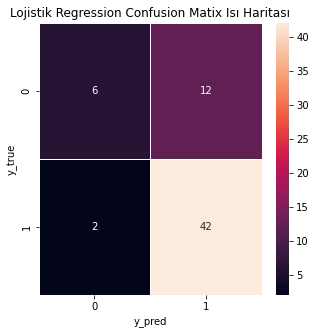

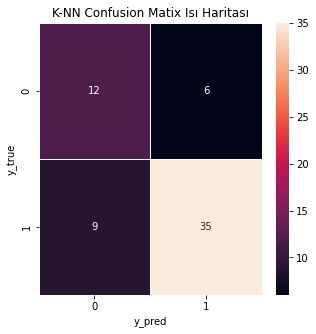

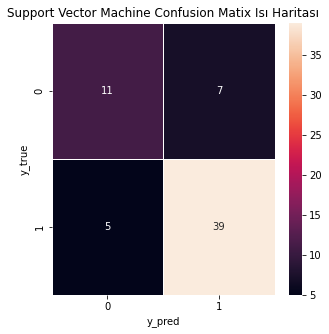

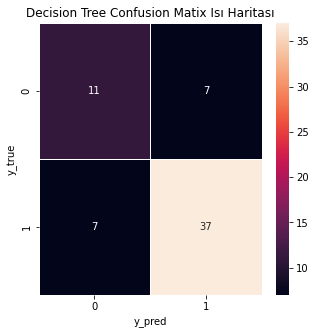

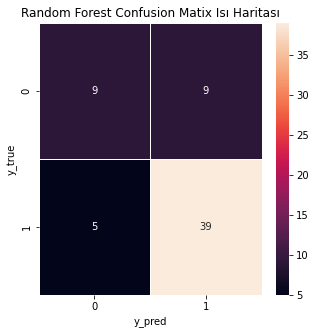

In [33]:
mp.figure()

f,ax=mp.subplots(figsize=(5,5))
sbn.heatmap(cm_lr,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
mp.xlabel("y_pred")
mp.ylabel("y_true")
mp.title("Lojistik Regression Confusion Matix Isı Haritası")


f,ax=mp.subplots(figsize=(5,5))
sbn.heatmap(cm_knn,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
mp.xlabel("y_pred")
mp.ylabel("y_true")
mp.title("K-NN Confusion Matix Isı Haritası")


f,ax=mp.subplots(figsize=(5,5))
sbn.heatmap(cm_svm,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
mp.xlabel("y_pred")
mp.ylabel("y_true")
mp.title("Support Vector Machine Confusion Matix Isı Haritası")


f,ax=mp.subplots(figsize=(5,5))
sbn.heatmap(cm_dt,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
mp.xlabel("y_pred")
mp.ylabel("y_true")
mp.title("Decision Tree Confusion Matix Isı Haritası")


f,ax=mp.subplots(figsize=(5,5))
sbn.heatmap(cm_rf,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
mp.xlabel("y_pred")
mp.ylabel("y_true")
mp.title("Random Forest Confusion Matix Isı Haritası")
